In [1]:
import pandas as pd
import numpy as np
import re
import unicodedata
import seaborn as sns
import matplotlib.pyplot as plt

In [103]:
t1 = pd.read_csv("nacimiento_edad_semana.csv", sep=";", encoding="latin1") #OK1
t2 = pd.read_csv("partos_nacimientos.csv", sep=";", encoding="latin1") 
t3 = pd.read_csv("porcentaje_nacidos_nacionalidad.csv", sep=";", encoding="latin1") #OK2
df_fecundidad = pd.read_csv("tasa_fecundidad_nacionalidad.csv", sep=";") #me gusta mucho las columnas
t5 = pd.read_csv("aborto_metodo.csv", sep=";")#OK3
t6 = pd.read_csv("aborto_edad.csv", sep=";")#OK3
t7 = pd.read_csv("aborto_motivo.csv", sep=";")#OK3
t8 = pd.read_csv("aborto_gestacion.csv", sep=";")#OK3
t9 = pd.read_csv("conyuntural_fecundidad.csv", sep=";", encoding="latin1") #OK2
t10 = pd.read_csv("nacidos_semana_gestacion.csv", sep=";", encoding="latin1") #OK1
t11 = pd.read_csv("hombres_embarazo.csv", sep=";", encoding="latin1")
df_ive_cat = pd.read_csv("ive_catalunya.csv", sep=";")
df_mujeres = pd.read_csv("mujeres_intencion_3años.csv", sep=";", encoding="latin1")


Antes de juntar las tablas he mirado que todas las columnas coincidan y que si se tiene que modificar el nombre de las columnas o agrupar se pueda para que no se pierda información.

In [3]:
def convertir_edad_a_grupo(valor):
    # Casos directos
    if valor == "Todas las edades":
        return "Todas las edades"
    if valor == "Menos de 15 años":
        return "Menos de 15 años"
    if valor == "50 y más años":
        return "50 y más años"
    
    # Intentar extraer número de edad
    match = re.search(r'\d+', str(valor))
    if not match:
        return None  # o valor original si prefieres
    
    edad = int(match.group())
    
    if 15 <= edad <= 19:
        return "De 15 a 19 años"
    elif 20 <= edad <= 24:
        return "De 20 a 24 años"
    elif 25 <= edad <= 29:
        return "De 25 a 29 años"
    elif 30 <= edad <= 34:
        return "De 30 a 34 años"
    elif 35 <= edad <= 39:
        return "De 35 a 39 años"
    elif 40 <= edad <= 44:
        return "De 40 a 44 años"
    elif 45 <= edad <= 49:
        return "De 45 a 49 años"
    elif edad >= 50:
        return "50 y más años"
    elif edad < 15:
        return "Menos de 15 años"
    
    return None

t1["Edad de la madre"] = t1["Edad de la madre"].apply(convertir_edad_a_grupo)
t10["Edad de la madre"] = t10["Edad de la madre"].apply(convertir_edad_a_grupo)

t1 = t1.rename(columns={"Edad de la madre": "Grupo de edad de la madre"})
t10 = t10.rename(columns={"Edad de la madre": "Grupo de edad de la madre"})


In [4]:
t10 = t10.rename(columns={"Nacional y provincias": "Provincias"})

#### Limpieza de t5,t6,t7,t8 antes de juntar

In [5]:
def limpiar_concepto_abortos(df):
    reemplazos = {
        'Abortos voluntarios de mujeres residentes entre ': '',
        'Abortos voluntarios de mujeres residentes de ': '',
        'Abortos voluntarios de mujeres residentes ': ''
    }
    
    for buscar, nuevo in reemplazos.items():
        df["Concepto"] = df["Concepto"].str.replace(buscar, nuevo, regex=False)
    
    df["Concepto"] = df["Concepto"].str.strip()
    return df

In [6]:
def limpiar_columnas(df):
    columnas_a_eliminar = [
        "Tipo territorio",
        "Código territorio",
        "Territorio",
        "Unidad",
        "Estado dato"
    ]
    
    df = df.drop(columns=columnas_a_eliminar, errors="ignore")
    return df

In [7]:
def quitar_acentos(texto):
    if isinstance(texto, str):
        return ''.join(c for c in unicodedata.normalize('NFKD', texto) if not unicodedata.combining(c))
    return texto

In [8]:
def renombrar_columna(df, vieja, nueva):
    df = df.rename(columns={vieja: nueva})
    return df

Limpieza del t5

In [9]:
t5.head(3)

,Año,Concepto,Tipo territorio,Código territorio,Territorio,Valor,Unidad,Estado dato
0,2011,Abortos voluntarios de mujeres residentes real...,Otros,NaN,NaN,3728,Número,NaN
1,2011,Abortos voluntarios de mujeres residentes real...,Otros,NaN,NaN,424,Número,NaN
2,2011,Abortos voluntarios de mujeres residentes real...,Otros,NaN,NaN,16231,Número,NaN


In [10]:
t5 = renombrar_columna(t5, "Año", "Anyo")
t5.head()

,Anyo,Concepto,Tipo territorio,Código territorio,Territorio,Valor,Unidad,Estado dato
0,2011,Abortos voluntarios de mujeres residentes real...,Otros,NaN,NaN,3728,Número,NaN
1,2011,Abortos voluntarios de mujeres residentes real...,Otros,NaN,NaN,424,Número,NaN
2,2011,Abortos voluntarios de mujeres residentes real...,Otros,NaN,NaN,16231,Número,NaN
3,2011,Abortos voluntarios de mujeres residentes real...,Otros,NaN,NaN,304,Número,NaN
4,2011,Abortos voluntarios de mujeres residentes real...,Otros,NaN,NaN,76,Número,NaN


In [11]:
t5 = limpiar_columnas(t5)
t5.head()

,Anyo,Concepto,Valor
0,2011,Abortos voluntarios de mujeres residentes real...,3728
1,2011,Abortos voluntarios de mujeres residentes real...,424
2,2011,Abortos voluntarios de mujeres residentes real...,16231
3,2011,Abortos voluntarios de mujeres residentes real...,304
4,2011,Abortos voluntarios de mujeres residentes real...,76


In [12]:
t5 = limpiar_concepto_abortos(t5)
t5.tail()

,Anyo,Concepto,Valor
65,2024,realizados por el método de prostaglandinas,357
66,2024,realizados por el método de mifepristona,790
67,2024,realizados por el método de dilatación y evacu...,4480
68,2024,realizados por el método de dilatación y aspir...,12605
69,2024,realizados por otros métodos / no consta,10


In [13]:
t5["Concepto"] = (t5['Concepto']
.str.replace('Abortos voluntarios de mujeres residentes realizados por el metodo de ', '', regex=False)
#.str.replace('Abortos voluntarios de mujeres residentes realizados por ', '', regex=False)
.str.replace(' / ', ' ', regex=False)
.str.strip()
)
t5.head()

,Anyo,Concepto,Valor
0,2011,realizados por el método de dilatación y evacu...,3728
1,2011,realizados por el método de mifepristona,424
2,2011,realizados por el método de dilatación y aspir...,16231
3,2011,realizados por el método de prostaglandinas,304
4,2011,realizados por otros métodos no consta,76


In [14]:
t5['Concepto'] = t5['Concepto'].apply(quitar_acentos)
t5.head()

,Anyo,Concepto,Valor
0,2011,realizados por el metodo de dilatacion y evacu...,3728
1,2011,realizados por el metodo de mifepristona,424
2,2011,realizados por el metodo de dilatacion y aspir...,16231
3,2011,realizados por el metodo de prostaglandinas,304
4,2011,realizados por otros metodos no consta,76


Limpieza del dataset t6

In [15]:
t6.head(3)

,Año,Concepto,Tipo territorio,Código territorio,Territorio,Valor,Unidad,Estado dato
0,1986,Abortos voluntarios de mujeres residentes entr...,Otros,NaN,NaN,-,Número,NaN
1,1986,Abortos voluntarios de mujeres residentes de 4...,Otros,NaN,NaN,-,Número,NaN
2,1986,Abortos voluntarios de mujeres residentes entr...,Otros,NaN,NaN,-,Número,NaN


In [16]:
t6 = renombrar_columna(t6, "Año", "Anyo")
t6 = limpiar_concepto_abortos(t6)
t6['Concepto'] = t6['Concepto'].apply(quitar_acentos)
t6 = limpiar_concepto_abortos(t6)
t6 = limpiar_columnas(t6)
t6.tail()

,Anyo,Concepto,Valor
346,2024,Total abortos voluntarios de mujeres residentes,18149
347,2024,15 y 19 anos,1759
348,2024,30 y 34 anos,3575
349,2024,44 anos y mas,125
350,2024,40 y 44 anos,1294


Limpieza dataset t7

In [17]:
t7.head(3)

,Año,Concepto,Tipo territorio,Código territorio,Territorio,Valor,Unidad,Estado dato
0,1986,Abortos voluntarios de mujeres residentes por ...,Otros,NaN,NaN,1,Número,NaN
1,1986,Abortos voluntarios de mujeres residentes por ...,Otros,NaN,NaN,-,Número,NaN
2,1986,Abortos voluntarios de mujeres residentes por ...,Otros,NaN,NaN,-,Número,NaN


In [18]:
t7 = renombrar_columna(t7, "Año", "Anyo")
t7 = limpiar_columnas(t7)
t7 = limpiar_concepto_abortos(t7)
t7['Concepto'] = t7['Concepto'].apply(quitar_acentos)
t7.head()


,Anyo,Concepto,Valor
0,1986,por violacion,1
1,1986,por riesgo de graves anomalias del feto,-
2,1986,por grave riesgo para la vida o salud de la em...,-
3,1986,por salud materna,137
4,1986,anomalias fetales incompatibles con la vida o ...,-


Limpieza dataset t8

In [19]:
t8.head(3)

,Año,Concepto,Tipo territorio,Código territorio,Territorio,Valor,Unidad,Estado dato
0,1986,Abortos voluntarios de mujeres residentes entr...,Otros,NaN,NaN,-,Número,NaN
1,1986,Abortos voluntarios de mujeres residentes de l...,Otros,NaN,NaN,6,Número,NaN
2,1986,Abortos voluntarios de mujeres residentes entr...,Otros,NaN,NaN,1,Número,NaN


In [20]:
t8 = renombrar_columna(t8, "Año", "Anyo")
t8 = limpiar_columnas(t8)
t8 = limpiar_concepto_abortos(t8)
t8['Concepto'] = t8['Concepto'].apply(quitar_acentos)
t8.head(3)

,Anyo,Concepto,Valor
0,1986,13 y 16 semanas de gestacion,-
1,1986,los que no consta las semanas de gestacion,6
2,1986,21 semanas y mas de gestacion,1


juntar los datasets, crear una columna para saber que dato es de que datasets y pivotear

In [21]:
t5["origen"] = "metodo"
t6["origen"] = "edad"
t7["origen"] = "motivo"
t8["origen"] = "gestacion"

## Agrupamos por categoria 
1. Nacionalidad
2. Fecundidad
3. Aborto
4. Catalunya IVE

In [22]:
df_nacimientos = pd.concat([t1, t10], ignore_index=True)
df_nacimientos_nacionalidad = pd.concat([t3, t9], ignore_index=True)
df_abortos = pd.concat([t5, t6, t7, t8], ignore_index=True)
df_ive_cat
df_mujeres
df_fecundidad


,Comunidades y Ciudades Autónomas,Nacionalidad,Edad,Periodo,Total
0,Total Nacional,Ambas nacionalidades,De 10 a 14 años,2024,"0,07"
1,Total Nacional,Ambas nacionalidades,De 10 a 14 años,2023,"0,06"
2,Total Nacional,Ambas nacionalidades,De 10 a 14 años,2022,"0,06"
3,Total Nacional,Ambas nacionalidades,De 10 a 14 años,2021,"0,05"
4,Total Nacional,Ambas nacionalidades,De 10 a 14 años,2020,"0,05"
...,...,...,...,...,...
26995,19 Melilla,Extranjera,50 y más años,1979,NaN
26996,19 Melilla,Extranjera,50 y más años,1978,NaN
26997,19 Melilla,Extranjera,50 y más años,1977,NaN
26998,19 Melilla,Extranjera,50 y más años,1976,NaN


LImpieza de df_nacimientos
. renombrar el nombre de las columnas
. eliminar valores nulos en caso de haber 


In [23]:
df_nacimientos.rename(columns={"Grupo de edad de la madre": "Grupo_edad_madre",'Semanas de gestaciÃ³n': 'Semanas_gestacion'}, inplace=True)

LImpieza de df_nacimientos_nacionalidad

In [24]:
df_nacimientos_nacionalidad["Total"].unique()

array(['52,70', '52,42', '52,56', '36,64', '36,78', '36,22', '7,94',
       '8,07', '8,48', '2,72', '2,74', '44,92', '43,71', '43,74', '33,43',
       '33,84', '32,81', '13,92', '14,69', '15,34', '7,73', '7,77',
       '8,12', '1,1', '1,12', '1,16', '1,18', '1,23', '1,26', '1,31',
       '1,33', '1,32', '1,27', '1,34', '1,37', '1,38', '1,44', '1,36',
       '1,3', '1,25', '1,24', '1,21', '1,13', '1,15', '1,14', '1,19',
       '1,4', '1,45', '1,49', '1,55', '1,64', '1,72', '1,8', '1,94',
       '2,04', '2,21', '2,37', '2,54', '2,65', '2,77', '0,57', '0,6',
       '0,62', '0,63', '0,64', '0,68', '0,7', '0,71', '0,73', '0,74',
       '0,76', '0,79', '0,81', '0,72', '0,66', '0,61', '0,58', '0,56',
       '0,67', '0,69', '0,75', '0,8', '0,83', '0,9', '0,91', '0,94',
       '0,98', '1,02', '1', '0,39', '0,4', '0,42', '0,41', '0,44', '0,46',
       '0,48', '0,49', '0,47', '0,45', '0,51', '0,43', '0,5', '0,55',
       '0,53', '0,65', '0,82', '0,84', '0,1', '0,11', '0,12', '0,13',
       '0,14'

In [25]:
df_nacimientos_nacionalidad.rename(columns={"Orden de nacimiento": "Orden_nacimiento"}, inplace=True)
df_nacimientos_nacionalidad['Nacionalidad'] = df_nacimientos_nacionalidad['Nacionalidad'].replace('EspaÃ±ola', 'Espanola')
df_nacimientos_nacionalidad['Orden_nacimiento'] = df_nacimientos_nacionalidad['Orden_nacimiento'].replace('Cuarto y mÃ¡s', 'Cuarto y mas')


In [26]:
df_abortos.head()

,Anyo,Concepto,Valor,origen
0,2011,realizados por el metodo de dilatacion y evacu...,3728,metodo
1,2011,realizados por el metodo de mifepristona,424,metodo
2,2011,realizados por el metodo de dilatacion y aspir...,16231,metodo
3,2011,realizados por el metodo de prostaglandinas,304,metodo
4,2011,realizados por otros metodos no consta,76,metodo


LImpieza dataset df_nacimientos_nacionalidad

In [27]:
df_nacimientos_nacionalidad  = df_nacimientos_nacionalidad.drop(columns=["Totales Territoriales"])

In [28]:
df_nacimientos_nacionalidad["Nacionalidad"] = (df_nacimientos_nacionalidad['Nacionalidad']
.str.replace('EspaÃ±ola', 'Espanola', regex=False)
.str.replace(' / ', ' ', regex=False)
.str.strip()
)

Limpieza dataset df_mujeres

In [29]:
df_fecundidad["Total_numerico"] = (
    df_fecundidad["Total"]
    .astype(str)
    .str.strip()
    .str.replace(",", ".", regex=False)
    .astype(float)
)
df_fecundidad["Total"].dtype

dtype('O')

Cree tablas temporales 

In [30]:
df_temp_ambas = df_fecundidad[
    (df_fecundidad["Nacionalidad"] == "Ambas nacionalidades") &
    (df_fecundidad["Comunidades y Ciudades Autónomas"] != "Total Nacional")
].copy()

df_temp_ambas["Comunidades y Ciudades Autónomas"].unique()

array(['01 Andalucía', '02 Aragón', '03 Asturias, Principado de',
       '04 Balears, Illes', '05 Canarias', '06 Cantabria',
       '07 Castilla y León', '08 Castilla - La Mancha', '09 Cataluña',
       '10 Comunitat Valenciana', '11 Extremadura', '12 Galicia',
       '13 Madrid, Comunidad de', '14 Murcia, Región de',
       '15 Navarra, Comunidad Foral de', '16 País Vasco', '17 Rioja, La',
       '18 Ceuta', '19 Melilla'], dtype=object)

In [31]:
#tabla donde la nacionalidad sea diferente a Ambas Nacionalidades
df_temp_extr_esp = df_fecundidad[
    (df_fecundidad["Nacionalidad"].isin(["Extranjera", "Española"])) &
    (df_fecundidad["Comunidades y Ciudades Autónomas"] != "Total Nacional")
].copy()

df_temp_extr_esp.head()

,Comunidades y Ciudades Autónomas,Nacionalidad,Edad,Periodo,Total,Total_numerico
1800,01 Andalucía,Española,De 10 a 14 años,2024,"0,06",0.06
1801,01 Andalucía,Española,De 10 a 14 años,2023,"0,06",0.06
1802,01 Andalucía,Española,De 10 a 14 años,2022,"0,07",0.07
1803,01 Andalucía,Española,De 10 a 14 años,2021,"0,08",0.08
1804,01 Andalucía,Española,De 10 a 14 años,2020,"0,05",0.05


#### Empezamos...

1. ANALYSIS: df_abortos

## ¿Qué métodos de aborto son los más utilizados cada año?


In [32]:
df_abortos.head()

,Anyo,Concepto,Valor,origen
0,2011,realizados por el metodo de dilatacion y evacu...,3728,metodo
1,2011,realizados por el metodo de mifepristona,424,metodo
2,2011,realizados por el metodo de dilatacion y aspir...,16231,metodo
3,2011,realizados por el metodo de prostaglandinas,304,metodo
4,2011,realizados por otros metodos no consta,76,metodo


Convertir de tipo objeto a int

In [33]:
df_abortos['Valor'] = pd.to_numeric(df_abortos['Valor'], errors='coerce')
df_abortos['Valor']= df_abortos['Valor'].fillna(0)
df_abortos['Valor']= df_abortos['Valor'].astype(int) 


In [34]:
1. ANALYSIS: df_abortos
------------------------------------------------------------
df_abortos.head()
## ❓ Pregunta 1: ¿Qué métodos de aborto son los más utilizados cada año?
df_abortos.groupby(["Año", "Concepto"])["Valor"].sum().unstack().plot(kind="bar", figsize=(12,6))
plt.title("Métodos de aborto por año")
plt.show()
## ❓ Pregunta 2: ¿Cómo evoluciona el total de abortos por año?
df_abortos.groupby("Año")["Valor"].sum().plot(kind="line", marker="o", figsize=(10,5))
plt.title("Tendencia total de abortos por año")
plt.show()
## ❓ Pregunta 3: ¿Qué porcentaje representa cada concepto dentro del total?
df_abortos_pct = (
    df_abortos.groupby("Concepto")["Valor"].sum()
    / df_abortos["Valor"].sum()
    * 100
)
df_abortos_pct.sort_values(ascending=False)
## ❓ Pregunta 4: ¿Qué conceptos han crecido o disminuido más?
df_growth = df_abortos.pivot_table(values="Valor", index="Concepto", columns="Año")
df_growth["crecimiento_%"] = ((df_growth.iloc[:,-1] - df_growth.iloc[:,0]) / df_growth.iloc[:,0]) * 100
df_growth.sort_values("crecimiento_%", ascending=False)
## ❓ Pregunta 5: ¿Qué concepto presenta mayor variabilidad en el tiempo?
df_abortos.groupby("Concepto")["Valor"].std().sort_values(ascending=False)



SyntaxError: invalid syntax (3624579401.py, line 1)

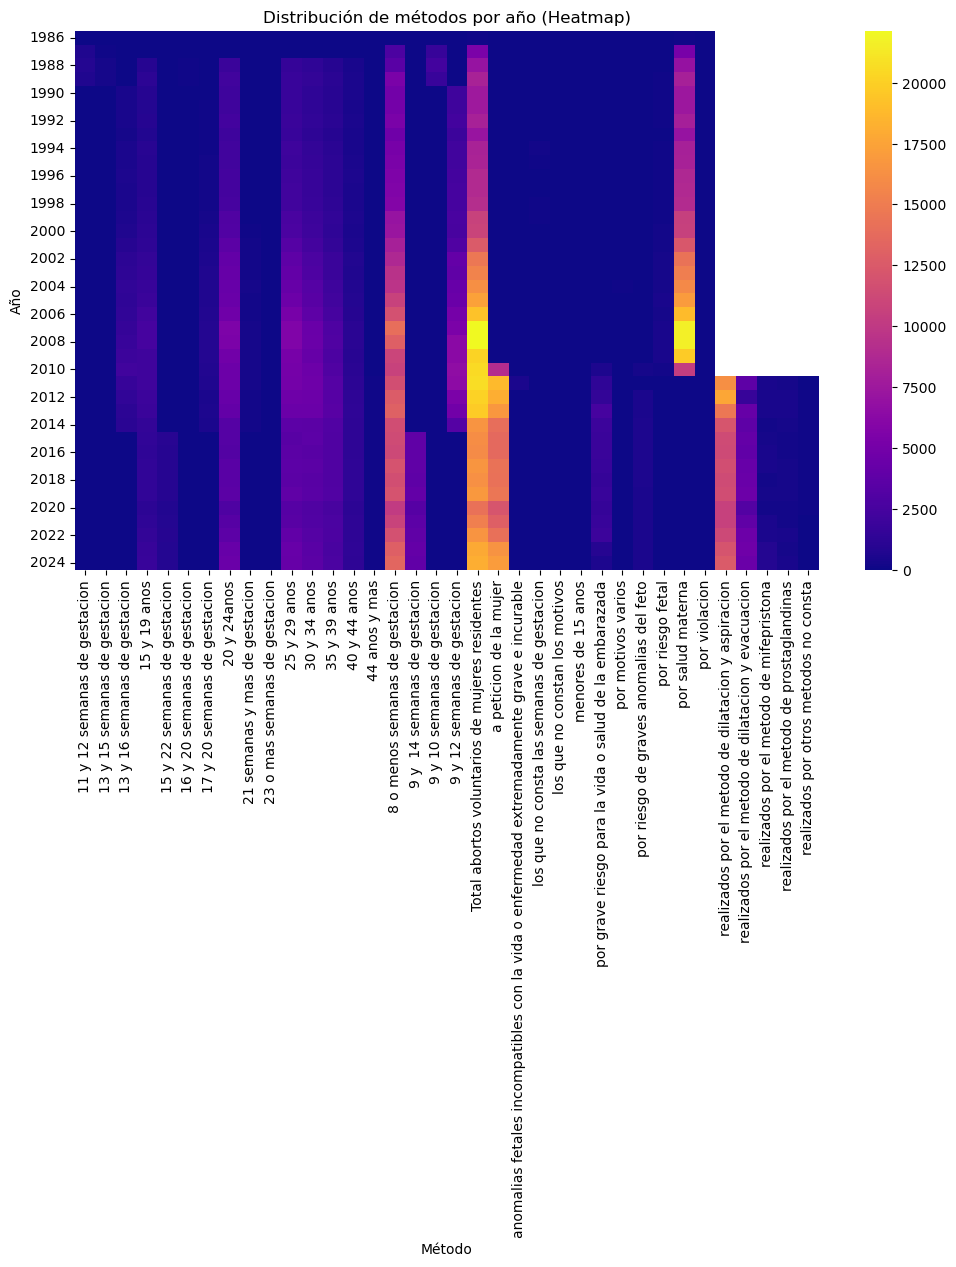

In [ ]:
pivot = df_abortos.groupby(["Anyo", "Concepto"])["Valor"].sum().unstack()
pivot.dtypes
plt.figure(figsize=(12,7))
sns.heatmap(pivot, cmap="plasma", annot=False)
plt.title("Distribución de métodos por año (Heatmap)")
plt.xlabel("Método")
plt.ylabel("Año")
plt.show()



In [ ]:
pivot.dtypes

Concepto
11 y 12 semanas de gestacion                                                                 float64
13 y 15 semanas de gestacion                                                                 float64
13 y 16 semanas de gestacion                                                                 float64
15 y 19 anos                                                                                 float64
15 y 22 semanas de gestacion                                                                 float64
16 y 20 semanas de gestacion                                                                 float64
17 y 20 semanas de gestacion                                                                 float64
20 y 24anos                                                                                  float64
21 semanas y mas de gestacion                                                                float64
23 o mas semanas de gestacion                                                     

In [ ]:
df_abortos["Valor"]

0        3728
1         424
2       16231
3         304
4          76
        ...  
1274        0
1275        0
1276        0
1277        0
1278    13441
Name: Valor, Length: 1279, dtype: int64

# Practicas desde aqui

In [35]:
df_abortos.head()

,Anyo,Concepto,Valor,origen
0,2011,realizados por el metodo de dilatacion y evacu...,3728,metodo
1,2011,realizados por el metodo de mifepristona,424,metodo
2,2011,realizados por el metodo de dilatacion y aspir...,16231,metodo
3,2011,realizados por el metodo de prostaglandinas,304,metodo
4,2011,realizados por otros metodos no consta,76,metodo


In [55]:
df_abortos[df_abortos["origen"] == "metodo"]["Concepto"].unique()


array(['realizados por el metodo de dilatacion y evacuacion',
       'realizados por el metodo de mifepristona',
       'realizados por el metodo de dilatacion y aspiracion',
       'realizados por el metodo de prostaglandinas',
       'realizados por otros metodos no consta'], dtype=object)

Tenemos 

In [74]:
df_metodos = df_abortos[df_abortos["Concepto"] != "Total abortos voluntarios de mujeres residentes"]
df_abortos_porcentajes = (
    df_metodos.groupby("Concepto")["Valor"].sum()
    / df_metodos["Valor"].sum()
    * 100
).sort_values(ascending=False)



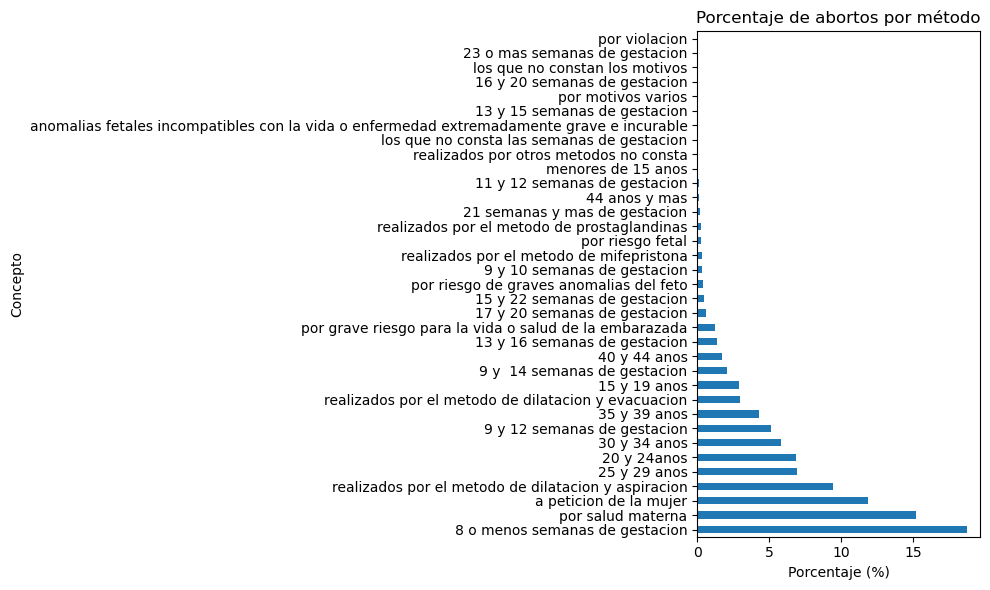

In [75]:
df_abortos_porcentajes.plot(
    kind="barh",
    figsize=(10,6),
    title="Porcentaje de abortos por método",
    xlabel="Porcentaje (%)"
)
plt.tight_layout()
plt.show()


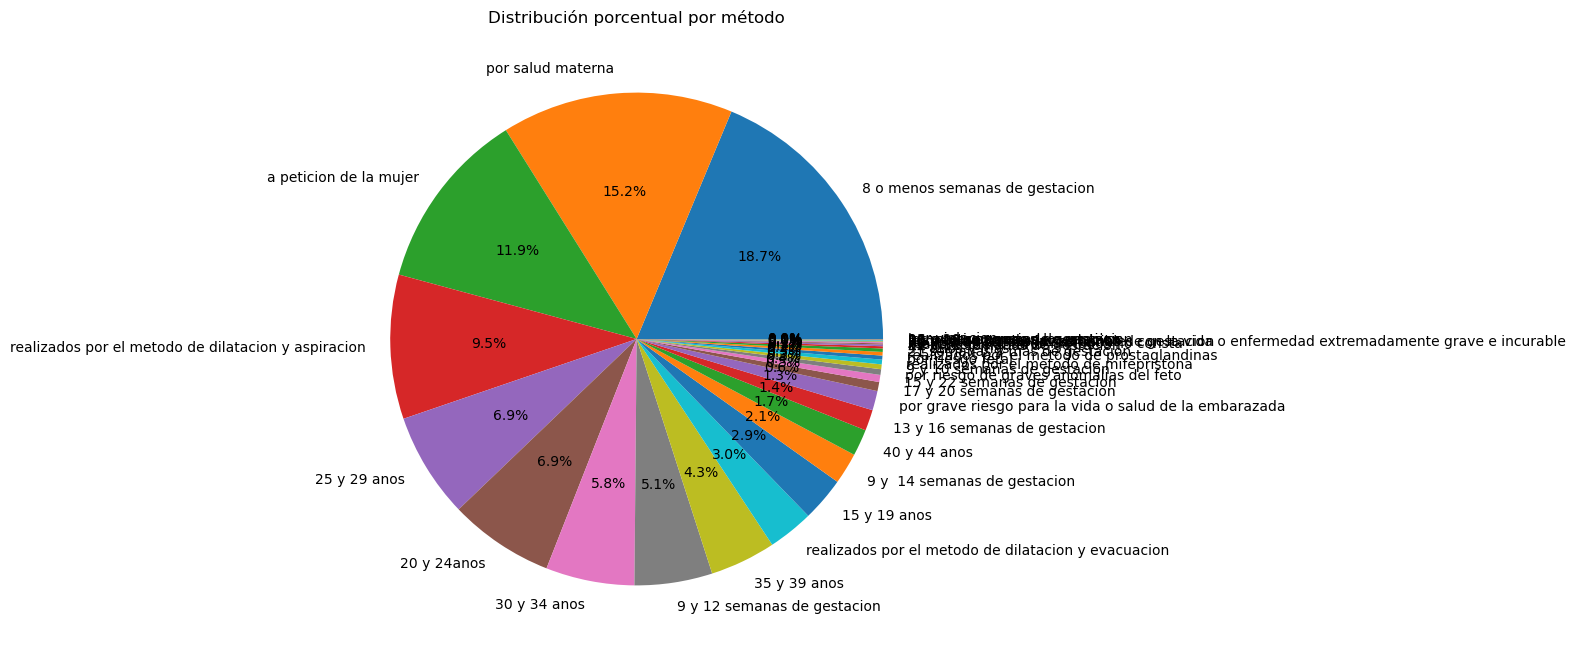

In [77]:
df_abortos_porcentajes.plot(
    kind="pie",
    autopct="%1.1f%%",
    figsize=(8,8),
    title="Distribución porcentual por método"
)
plt.ylabel("")
plt.show()


In [99]:
df_mujeres.head()

,Comunidades y Ciudades AutÃ³nomas,SituaciÃ³n sentimental,Tiene hijos,IntenciÃ³n de tener hijos,Total
0,Total Nacional,Total,Total,Total,11.926.861
1,Total Nacional,Total,Total,Tiene intenciÃ³n de tener hijos,2.290.661
2,Total Nacional,Total,Total,No tiene intenciÃ³n de tener hijos,9.636.200
3,Total Nacional,Total,Sin hijos,Total,4.815.743
4,Total Nacional,Total,Sin hijos,Tiene intenciÃ³n de tener hijos,1.419.531


In [89]:
df_mujeres["IntenciÃ³n de tener hijos"].unique()

array(['Total', 'Tiene intenciÃ³n de tener hijos',
       'No tiene intenciÃ³n de tener hijos'], dtype=object)

In [87]:
df_ = df_mujeres[df_mujeres["Comunidades y Ciudades AutÃ³nomas"] != "09 CataluÃ±a"]
df_filtro = df_[df_["Comunidades y Ciudades AutÃ³nomas"] != "Total Nacional"]
df_filtro["Comunidades y Ciudades AutÃ³nomas"].unique()

array(['01 AndalucÃ\xada', '02 AragÃ³n', '03 Asturias, Principado de',
       '04 Balears, Illes', '05 Canarias', '06 Cantabria',
       '07 Castilla y LeÃ³n', '08 Castilla - La Mancha',
       '10 Comunitat Valenciana', '11 Extremadura', '12 Galicia',
       '13 Madrid, Comunidad de', '14 Murcia, RegiÃ³n de',
       '15 Navarra, Comunidad Foral de', '16 PaÃ\xads Vasco',
       '17 Rioja, La', '18 Ceuta', '19 Melilla'], dtype=object)

In [ ]:
df_filtro

In [93]:
df_nacimientos.head()

,Provincias,Municipios,Grupo_edad_madre,Semanas_gestacion,Periodo,Total
0,02 Albacete,NaN,Todas las edades,Todas las semanas,2024,2.545
1,02 Albacete,NaN,Todas las edades,Todas las semanas,2023,2.563
2,02 Albacete,NaN,Todas las edades,Todas las semanas,2022,2.698
3,02 Albacete,NaN,Todas las edades,Todas las semanas,2021,2.790
4,02 Albacete,NaN,Todas las edades,Todas las semanas,2020,2.773


In [98]:
df_nacimientos["Periodo"].unique()

array([2024, 2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014,
       2013, 2012, 2011, 2010, 2009])

In [97]:
df_abortos.head()

,Anyo,Concepto,Valor,origen
0,2011,realizados por el metodo de dilatacion y evacu...,3728,metodo
1,2011,realizados por el metodo de mifepristona,424,metodo
2,2011,realizados por el metodo de dilatacion y aspir...,16231,metodo
3,2011,realizados por el metodo de prostaglandinas,304,metodo
4,2011,realizados por otros metodos no consta,76,metodo


In [92]:
df_fecundidad.head()

,Comunidades y Ciudades Autónomas,Nacionalidad,Edad,Periodo,Total,Total_numerico
0,Total Nacional,Ambas nacionalidades,De 10 a 14 años,2024,"0,07",0.07
1,Total Nacional,Ambas nacionalidades,De 10 a 14 años,2023,"0,06",0.06
2,Total Nacional,Ambas nacionalidades,De 10 a 14 años,2022,"0,06",0.06
3,Total Nacional,Ambas nacionalidades,De 10 a 14 años,2021,"0,05",0.05
4,Total Nacional,Ambas nacionalidades,De 10 a 14 años,2020,"0,05",0.05


In [104]:
df_ive_cat.columns

Index(['any', 'tipus de centre', 'mètode', 'finançament públic', 'grup d'edat',
       'situació de convivència', 'fills a càrrec', 'fills vius',
       'país de residència', 'codi de la comarca de residència',
       'nom de la comarca de residència', 'país de naixement',
       'primera nacionalitat', 'situació laboral', 'ingressos',
       'nombre de casos'],
      dtype='object')

In [106]:
df_ive_cat["situació laboral"].unique()

array(['Aturada o a la recerca de la primera feina remunerada',
       'Treballadora', 'Altres', 'No hi consta'], dtype=object)